Frame:

Home Credit is looking for patterns in its data regarding the default risk of consumer loans. Conduct an analysis to surface any notable patterns related to default risk.

Rubric:
Develops well-informed, hypothesis-driven business questions for analysis.
Demonstrates ability to iterate and refine business questions based on new insights.

Tips/Info:
Can combine test and train. Refer back to schema. Dependent on credit scores (paying bills/debt on time, credit utilization such as debt vs current income and credit reports. Most credit scores range from 300 to 850

According to this article: https://www.investopedia.com/terms/d/defaultrisk.asp#:~:text=Default%20risk%20refers%20to%20the,credit%20reports%20and%20credit%20scores,
there's some important things to consider in terms of default risks:
-Default risk refers to how likely borrower won't be able to make their required debt payments to a lender.
-Check borrowers credit reports and credit scores.
-The default risk are rated by rating agencies.

Will most likely look up debt to income ratio and high interest rates
Hypothesis: 
Borrowers with risky debt to income ratios where they are borrowing more than they can earn. 
And those with high default risk will typically pay higher interest rates are more likely to be high risk for loan defaults. 

Extract:

Rubric:
Selects data that is relevant to the hypothesis-driven business question(s). 
Uses data extraction techniques and formatting appropriate for the selected data.

In this case, the 3 important data frames are the HomeCredit_columns_description table (aka the data dictionary), application_train with the list of applicants, and previous_application for information on consumes' prior applcations. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the libraries

In [2]:
columns = pd.read_csv('./Credit/HomeCredit_columns_description.csv', encoding = "ISO-8859-1")
appdata = pd.read_csv('./Credit/application_train.csv')
previous = pd.read_csv('./Credit/previous_application.csv')

# Import the data

In [3]:
display(columns)

# Each column provides an explanation of what the data is. 

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [4]:
# Start with some exploratory analysis methods to inspect the data
#appdata.head()
appdata.describe()
#appdata.dtypes

# Columns to join: Target (1), 122 columns
# NULLS: 5+

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
previous = pd.read_csv('./Credit/previous_application.csv') 
# Start with some exploratory analysis methods to inspect the data
previous.head()
#previous.describe() # rows, columns
#previous.dtypes
#previous.isnull().sum().sort_values(ascending=False)

#consumer = previous[previous['NAME_CONTRACT_TYPE'] == 'Consumer Loans'].value_counts(ascending=False)
#print(consumer)
# Columns to join: SK_ID_CURR, SK_ID_PREV
# NULLS: 16

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Wrangle and Prepare:
Imported data, including at least two DataFrames and at least one combination of DataFrames via methods such as joining.
Functions for cleaning the data set, with explanations for how null values are being handled in each field.

Rubric:
Implements data cleaning techniques such as removing duplicates and correcting erroneous values. 
Organizes raw data into a workable, analytics-friendly format. 

In [6]:
previous.isnull().sum().sort_values(ascending=False)
# Now to look for NULLS

# Important columns for analysis: NAME_CONTRACT_TYPE (filter for consumer loans)

# Columns for potential removal: AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'
# These columns would be important to include in the analysis. I could fill them in but using the median, mean, or mode doesn't seem appropriate. 
previous_app=previous.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
    'RATE_INTEREST_PRIVILEGED', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 
    'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 
    'NFLAG_INSURED_ON_APPROVAL', 'NAME_TYPE_SUITE'],axis=1)

#display(app_train)
#display(previous_app)
# Remove: DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL, NAME_TYPE_SUITE
# For my respective analysis, I'm more interested in the reasons why a consumer was rejected
#previous.describe()
#previous['AMT_ANNUITY'].describe()
# Mean: 15955
previous_app.fillna({'AMT_ANNUITY': 15955}, inplace=True)

#previous['AMT_GOODS_PRICE'].describe()
# Mean: 227847
previous_app.fillna({'AMT_GOODS_PRICE': 227847}, inplace=True)

#previous['CNT_PAYMENT'].describe()
# Mean: 16
previous_app.fillna({'CNT_PAYMENT': 16}, inplace=True)

#previous['PRODUCT_COMBINATION'].value_counts()
# Better to use value_counts instead of describe since this column are strings
previous_app.fillna({'PRODUCT_COMBINATION': 'Cash'}, inplace=True)

#display(previous_app)
# Now, need to determine how to handle the NULLs from AMT_GOODS_PRICE, AMT_ANNUITY, CNT_PAYMENT, PRODUCT_COMBINATION
# Prefer to use mean instead of median to get an average amount

previous_app['AMT_CREDIT'].value_counts()
# Mode: 0
previous_app.fillna({'AMT_CREDIT': 0}, inplace=True)
previous_app.isnull().sum()
# Oh, there's one value missing in amt_credit. Let's fix that really quick. 

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [7]:
# Now to look for NULLS in the appdata df

# Important columns for analysis: NAME_CONTRACT_TYPE (filter for consumer loans), loan ammount, annuity, etc. 

app_data=appdata.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

# Columns for potential removal: descriptive information about consumer's living quarters. Not needed.

#app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()
# Mode: 0
app_data.fillna({'AMT_REQ_CREDIT_BUREAU_HOUR': 0}, inplace=True)

#app_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()
# Mode: 0
app_data.fillna({'AMT_REQ_CREDIT_BUREAU_DAY': 0}, inplace=True)

#app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()
# Mode: 0
app_data.fillna({'AMT_REQ_CREDIT_BUREAU_WEEK': 0}, inplace=True)

#app_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()
# Mode: 0
app_data.fillna({'AMT_REQ_CREDIT_BUREAU_MON': 0}, inplace=True)

#app_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()
# Mode: 0
app_data.fillna({'AMT_REQ_CREDIT_BUREAU_QRT': 0}, inplace=True)

#app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()
# Mean: 1.8
app_data.fillna({'AMT_REQ_CREDIT_BUREAU_YEAR': 1.89}, inplace=True)

# Looks like these columns have a significant amount of NULLs: AMT_REQ_CREDIT_BUREAU_HOUR, 
# AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, 
# AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR. Let's take a deeper dive. 

#app_data.isnull().sum()
display(app_data)

# NULLs have been addressed. 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.00
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.89
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.89
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.89
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.00
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00


In [8]:
def debt_income(row):
    return row['AMT_INCOME_TOTAL']/row['AMT_CREDIT']
app_data['debt_income'] = app_data.apply(debt_income, axis=1)
# No recording of credit score. Will need to look at the 5Cs of credit: https://www.investopedia.com/terms/f/five-c-credit.asp
# Credit history (unavailable), capacity (debt-to-income), capital (down payment - drop), collateral, conditions
# Let's create a debit to income ratio column

def dti_ratio(row):
    if debt_income(row) < .35:
        return "favorable"
    elif .36 >= debt_income(row) <= .49:
        return "adequate"
    else:
        return "risky"
app_data['dti_ratio'] = app_data.apply(dti_ratio, axis=1) 
app_data.head()
# According to https://www.investopedia.com/terms/d/dti.asp#:~:text=35%25%20or%20less%20is%20generally,ask%20for%20other%20eligibility%20requirements.
# Here are the ratios for debt_income
# <.35 = favorable
# .36-.49 = adequate
# .50+ = risky
# Let's create another column using a for loop

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,debt_income,dti_ratio
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.00,0.498036,risky
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.208736,favorable
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.500000,risky
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.89,0.431748,risky
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.236842,favorable


In [9]:
# Looks good. Now, how many risky borrowers do we have? 

risky_borrowers = app_data.dti_ratio.value_counts()['risky']
print(f"There are {risky_borrowers} risky borrowers")

There are 123464 risky borrowers


Analyze:

Rubric:
Manipulates data for exploration, insight gathering, and analysis.
Uses rationale for revising the original business question, collecting more data based on the initial analysis, or continuing on to interpretation. 

In [10]:
previous_app.groupby(['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS'])['CODE_REJECT_REASON'].value_counts()

# What were the most common reasons why a consumer loan was rejected?
# Top 3 reasons: LIMIT, HC, SCO

NAME_CONTRACT_TYPE  NAME_CONTRACT_STATUS  CODE_REJECT_REASON
Cash loans          Approved              XAP                   312540
                    Canceled              XAP                   268591
                    Refused               HC                    120766
                                          LIMIT                  21144
                                          SCO                    13606
                                          SCOFR                   5616
                                          VERIF                   2745
                                          XNA                     1998
                                          SYSTEM                    53
                    Unused offer          CLIENT                   494
Consumer loans      Approved              XAP                   626462
                                          XNA                        8
                    Canceled              XAP                     1559
                

In [11]:
app_data.groupby(['TARGET', 'dti_ratio'])['AMT_INCOME_TOTAL'].mean().sort_values(ascending=False)

# What is the average income of risky borrowers who struggle with making their payments on time? 
# risky: 198328 - high-income (> 150,000) borrowers are risky and prone to struggling with payments

TARGET  dti_ratio
1       risky        198328.276580
0       risky        190445.107200
        adequate     168399.042156
1       adequate     162560.236068
0       favorable    154185.164465
1       favorable    143340.029373
Name: AMT_INCOME_TOTAL, dtype: float64

In [12]:
combined= pd.merge(previous_app, app_data, on='SK_ID_CURR', how='inner')
combined.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)

combined.head()

# Now to join the tables together so we can filter by consumer loans, dti_ ratio, etc.

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,debt_income,dti_ratio
1345901,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.498036,risky
1241276,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.208736,favorable
1241278,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.208736,favorable
1241277,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.208736,favorable
1354064,1564014,100004,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,risky


Interpret:
At least two visualizations accompanied by textual descriptions of the business insights they communicate.

Rubric:

Creates appropriate visualizations that support the findings and insights. 
Identifies key insights pertaining to the original business question(s).
Incorporates results of the analysis to support decisions and recommendations. 

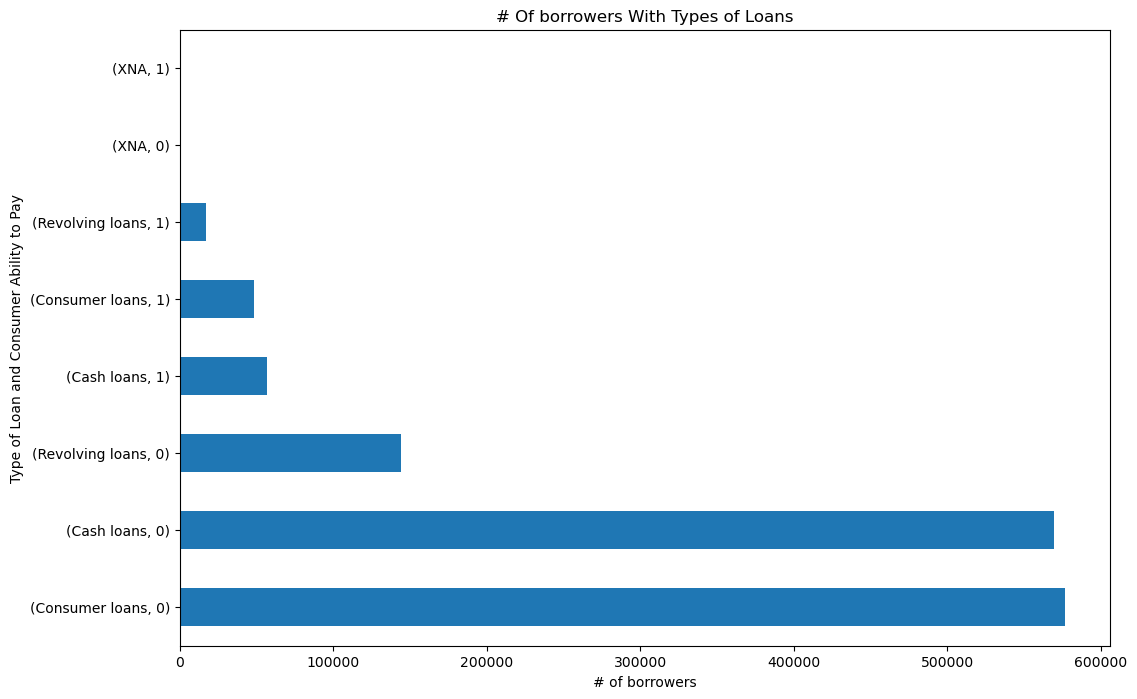

In [13]:
ax = combined[['NAME_CONTRACT_TYPE_x', 'TARGET']].value_counts().head(10).plot(kind = 'barh', rot=0,
    figsize = (12,8),
    ylabel = 'Type of Loan and Consumer Ability to Pay',
    xlabel = '# of borrowers',
    title = "# Of borrowers With Types of Loans",
    style = 'r-.'
);

# How many consumer loan borrowers are at risk of defaulting on their loans? TARGET == 1
# Less than 10%, about <50000

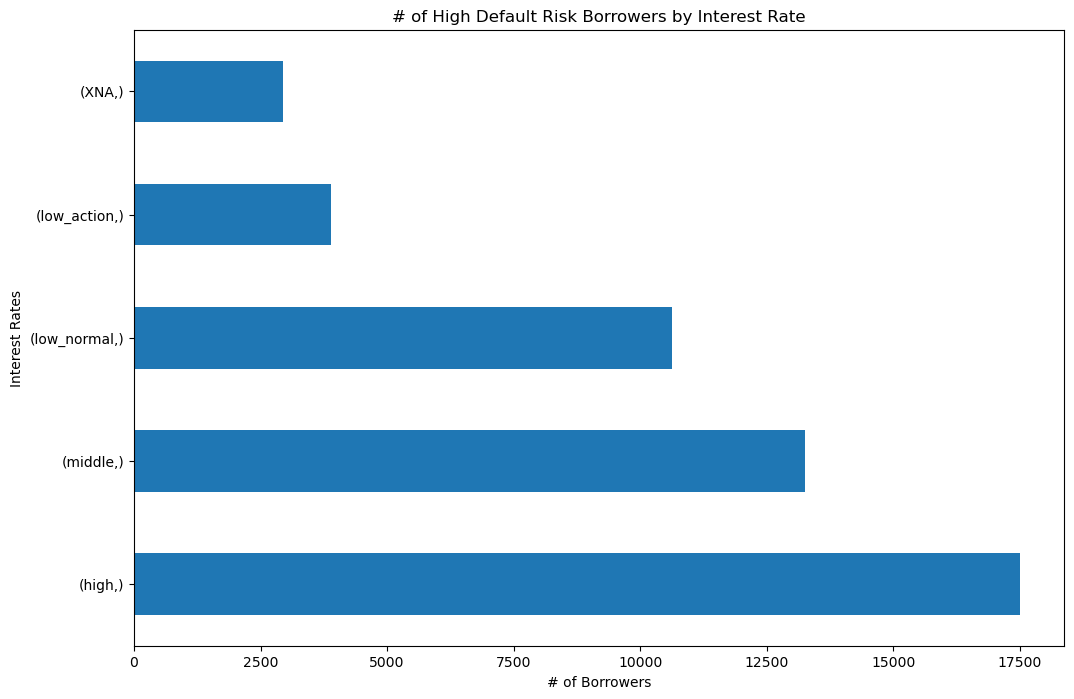

In [14]:
#This dataframe only has Consumer Loans & consumer who can't pay TARGET == 1
df_combined = combined[ (combined['NAME_CONTRACT_TYPE_x'] == 'Consumer loans') & (combined['TARGET'] == 1) ] 
df_combined.sort_index()

bx = df_combined[['NAME_YIELD_GROUP']].value_counts().plot(kind = 'barh', rot=0,
    figsize = (12,8),
    ylabel = 'Interest Rates',
    xlabel = '# of Risky Borrowers',
    title = '# of High Default Risk Borrowers by Interest Rate',
    style = 'r-.'
);

# Now, let's focus on consumer loans, their dti_ratio, and their loan status
# As suspected, filtering by Borrowers who struggled paying their consumer loans had high interest rates

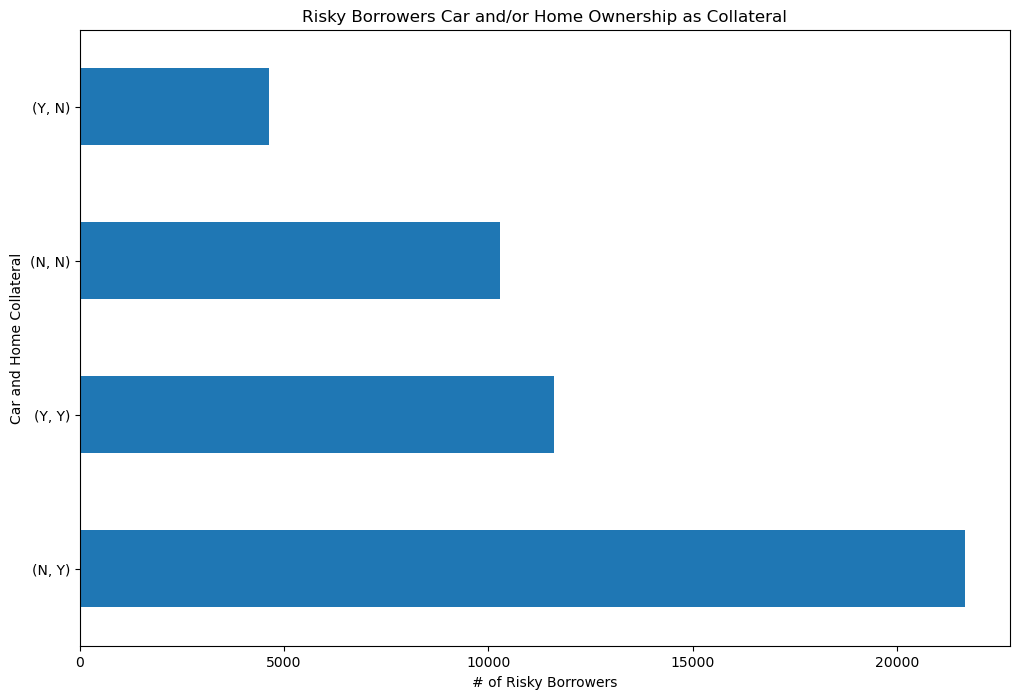

In [16]:
#This dataframe only has Consumer Loans & consumer who can't pay TARGET == 1

cx = df_combined[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].value_counts().plot(kind = 'barh', rot=0,
    figsize = (12,8),
    ylabel = 'Car and Home Collateral',
    xlabel = '# of Risky Borrowers',
    title = 'Risky Borrowers Car and/or Home Ownership as Collateral',
    style = 'r-.'
);

# Out of those risky borrowers, how many have collateral such as a car or home?
# Most risky borrowers have both as collateral, but majority only have a home for collateral

Hypothesis and Correlations Revealed During Analysis:

Hypothesis:
Risky borrowers who took out consumer loans were identified (<10%) as though having a debt-to-income (DTI) ratio higher than .5 or 50%, the threshold for most loans. To further confirm this, risky borrowers with high interest rates were more likely to be identified as at high risk of defaulting on their loans. Most risky borrowers have both as collateral, but majority only have a home for collateral.

Correlations:
There seems to be a relationship betweeen high DTI and high interest rates. Financial institutions consider financial risk when determining whether or not to issue a loan to a high default risk borrower. Further analysis could examine the types and amount of goods high risky borrowers apply loans for. It would also be helpful to have a more detailed data dictionary that explains the codes of why a borrower was rejected from a loan application.  